In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class AudioUnivariateAnalysis:
    def __init__(self, file_path):
        """
        Initialize the class by loading the audio file.
        :param file_path: Path to the audio file
        """
        self.file_path = file_path
        self.audio_data, self.sr = librosa.load(file_path)  # Load audio
        print(f"Loaded file: {file_path}")
        print(f"Sample rate: {self.sr}")
    
    def plot_waveform(self):
        """
        Plot the waveform of the audio signal.
        """
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(self.audio_data, sr=self.sr)
        plt.title('Waveform')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()

    def plot_spectrogram(self):
        """
        Compute and plot the spectrogram.
        """
        X = librosa.stft(self.audio_data)
        X_db = librosa.amplitude_to_db(abs(X))
        
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(X_db, sr=self.sr, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.show()

    def plot_zero_crossing_rate(self):
        """
        Compute and plot the zero-crossing rate.
        """
        zero_crossings = librosa.zero_crossings(self.audio_data, pad=False)
        zcr = librosa.feature.zero_crossing_rate(self.audio_data)

        plt.figure(figsize=(10, 4))
        plt.plot(zcr[0])
        plt.title('Zero-Crossing Rate')
        plt.xlabel('Frames')
        plt.ylabel('Rate')
        plt.show()

    def plot_spectral_centroid(self):
        """
        Compute and plot the spectral centroid.
        """
        spectral_centroid = librosa.feature.spectral_centroid(y=self.audio_data, sr=self.sr)[0]
        frames = range(len(spectral_centroid))
        t = librosa.frames_to_time(frames)

        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(self.audio_data, sr=self.sr, alpha=0.4)
        plt.plot(t, librosa.util.normalize(spectral_centroid), color='r')
        plt.title('Spectral Centroid')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Spectral Centroid')
        plt.show()


In [10]:
file_path = 'extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Sad/OAF_back_sad.wav'
#extracted_audio_files\TESS_Toronto_emotional_speech_set_data\OAF_angry\OAF_boat_angry.wav

In [11]:
audio_analysis = AudioUnivariateAnalysis(file_path)

Loaded file: extracted_audio_files/TESS_Toronto_emotional_speech_set_data/OAF_Sad/OAF_back_sad.wav
Sample rate: 22050


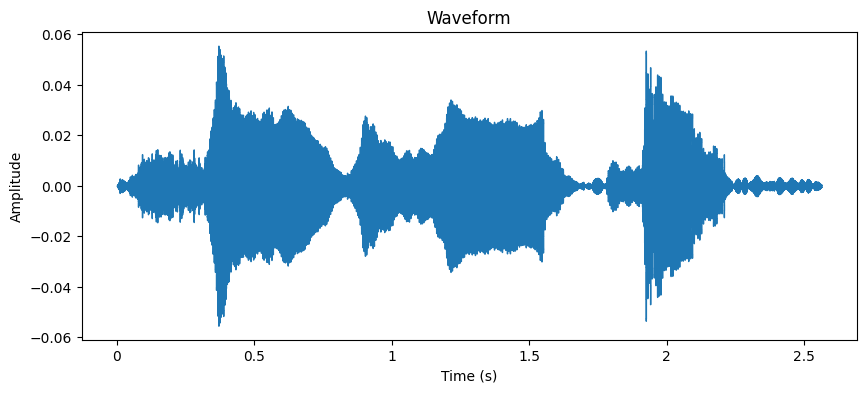

In [12]:
audio_analysis.plot_waveform()

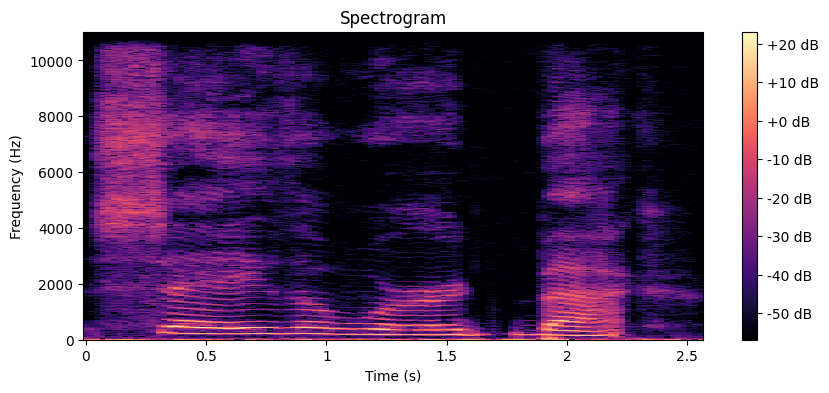

In [13]:
audio_analysis.plot_spectrogram()

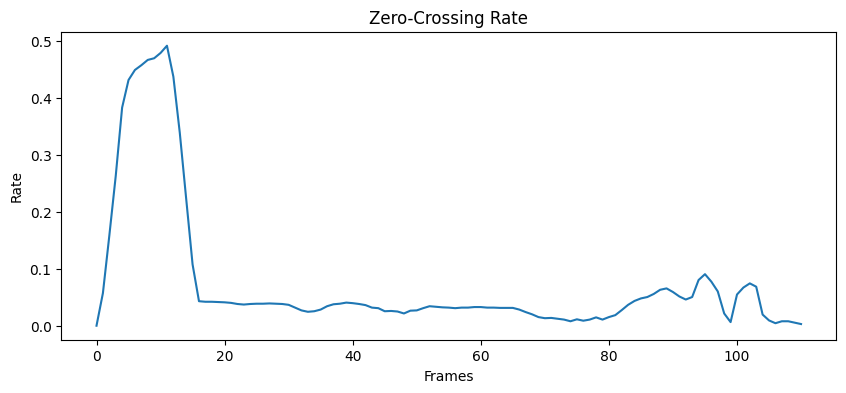

In [14]:
audio_analysis.plot_zero_crossing_rate()

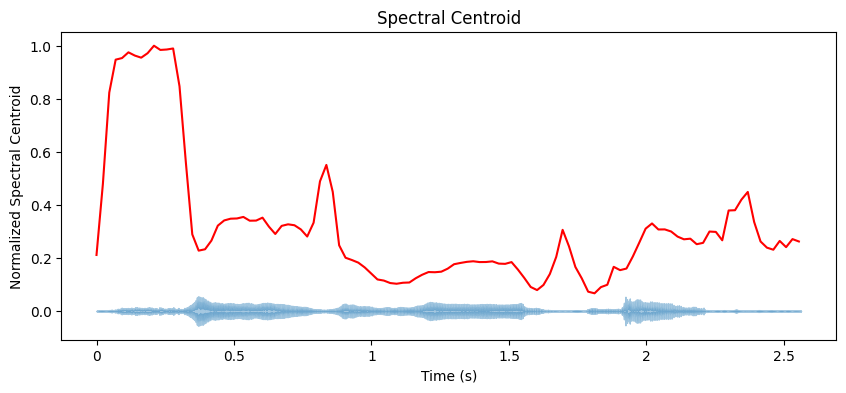

In [15]:
audio_analysis.plot_spectral_centroid()